In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
for col in df.columns:
    print(f"Number of unique values in {col}: {df[col].nunique()}")

Number of unique values in longitude: 844
Number of unique values in latitude: 862
Number of unique values in housing_median_age: 52
Number of unique values in total_rooms: 5926
Number of unique values in total_bedrooms: 1923
Number of unique values in population: 3888
Number of unique values in households: 1815
Number of unique values in median_income: 12928
Number of unique values in median_house_value: 3842
Number of unique values in ocean_proximity: 5


In [8]:
print(df['ocean_proximity'].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [9]:
df['people_per_room']=df['population']/df['total_rooms']
df['rooms_without_bedrooms']=df['total_rooms']-df['total_bedrooms']
df['average_family_size']=df['population']/df['households']



In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,people_per_room,rooms_without_bedrooms,average_family_size
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.619576,2098.633681,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.894913,1799.863103,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.018109,0.000000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.435523,1127.000000,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.516013,1681.000000,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,0.656865,2506.000000,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,392.631579,33110.000000,1243.333333


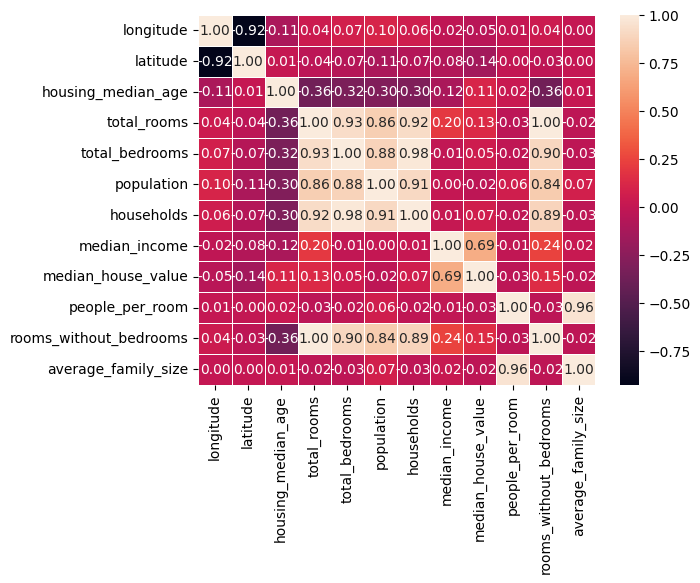

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f",linewidths=0.5)
plt.show()

In [12]:
def correlation_checker(df, threshold=0.8):
    corr=df.corr(numeric_only=True)
    cor_set=set()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j])>threshold:
                colname_i=corr.columns[i]
                colname_j=corr.columns[j]
                cor_set.add((colname_i, colname_j))
    return cor_set

In [13]:
high_corrs=correlation_checker(df, threshold=0.8)

In [14]:
high_corrs=list(high_corrs)
high_corrs

[('rooms_without_bedrooms', 'population'),
 ('population', 'total_bedrooms'),
 ('households', 'total_rooms'),
 ('rooms_without_bedrooms', 'households'),
 ('latitude', 'longitude'),
 ('households', 'population'),
 ('households', 'total_bedrooms'),
 ('total_bedrooms', 'total_rooms'),
 ('population', 'total_rooms'),
 ('average_family_size', 'people_per_room'),
 ('rooms_without_bedrooms', 'total_rooms'),
 ('rooms_without_bedrooms', 'total_bedrooms')]

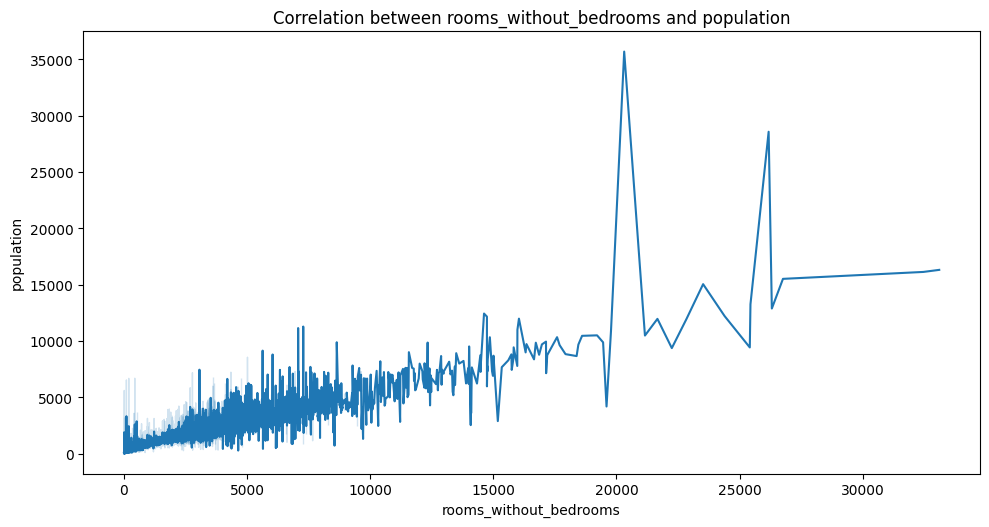

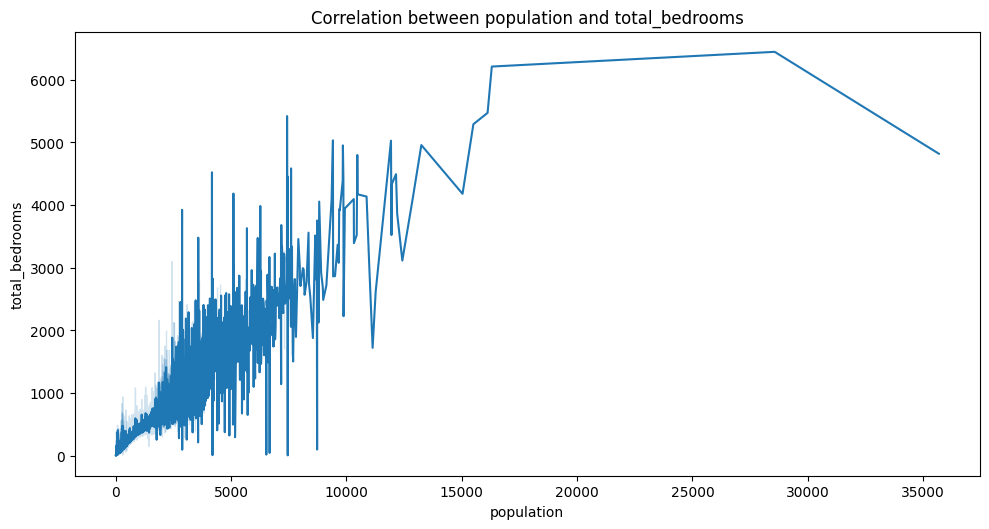

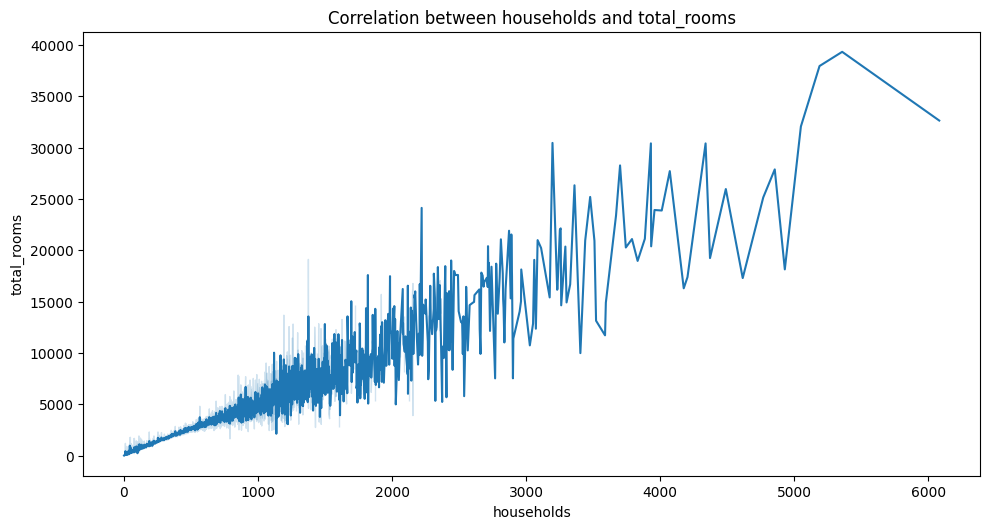

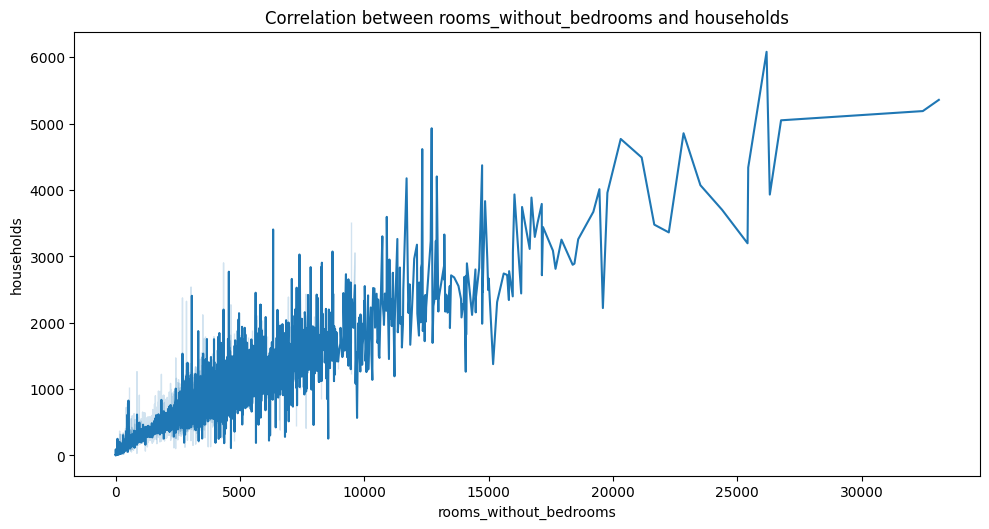

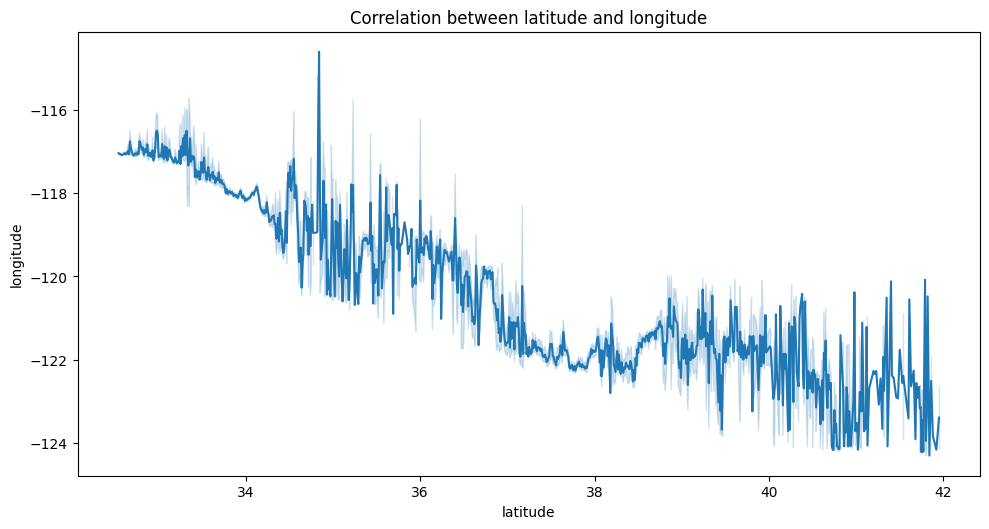

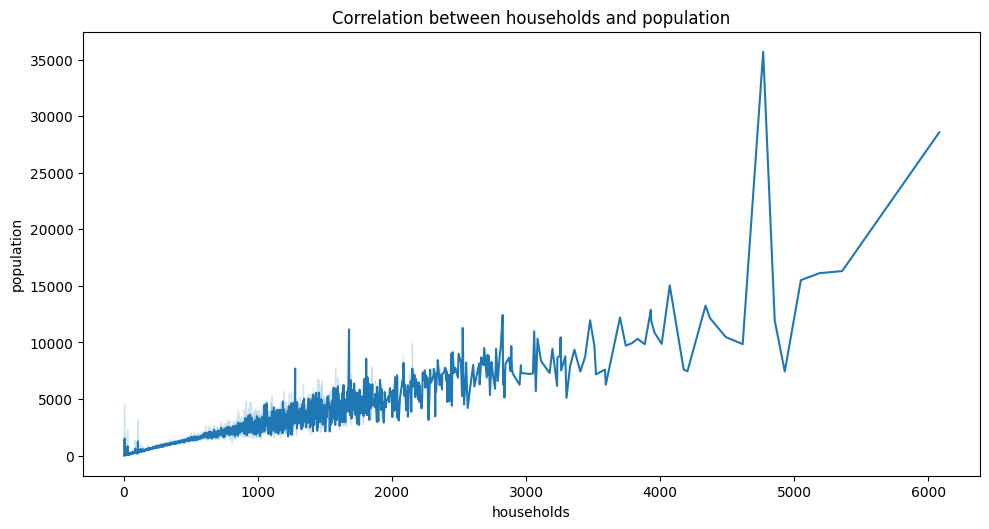

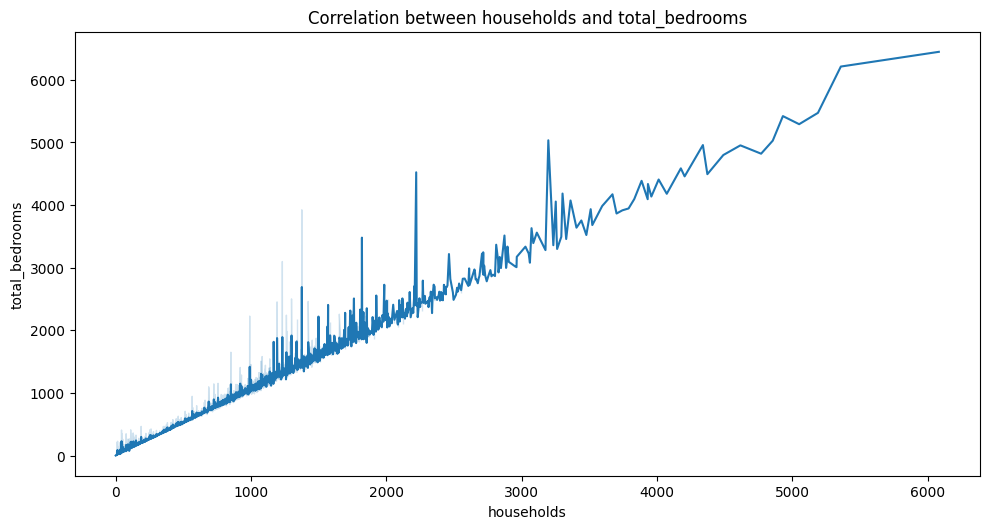

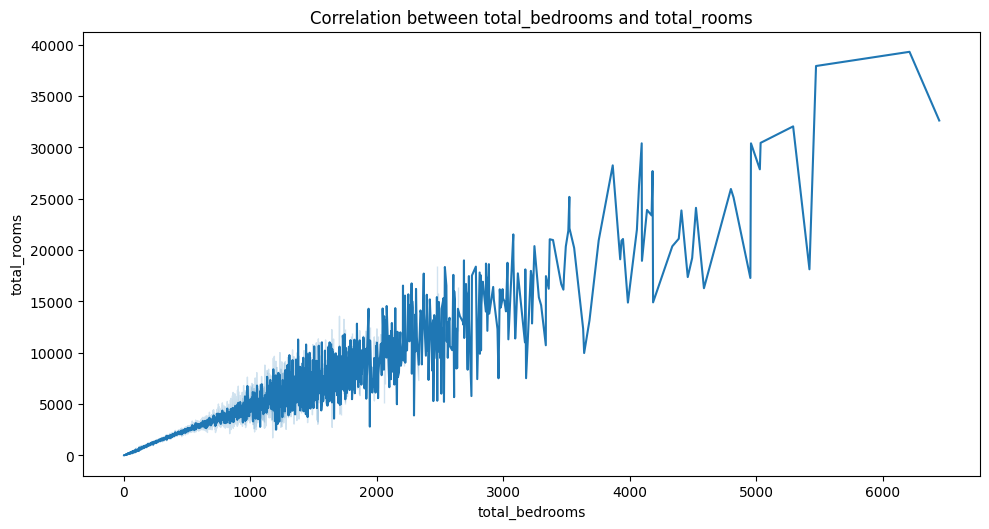

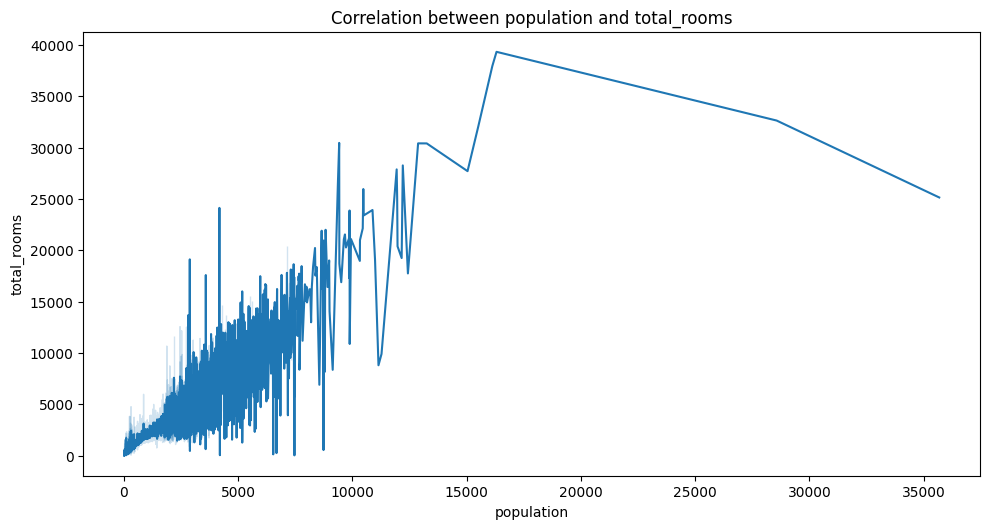

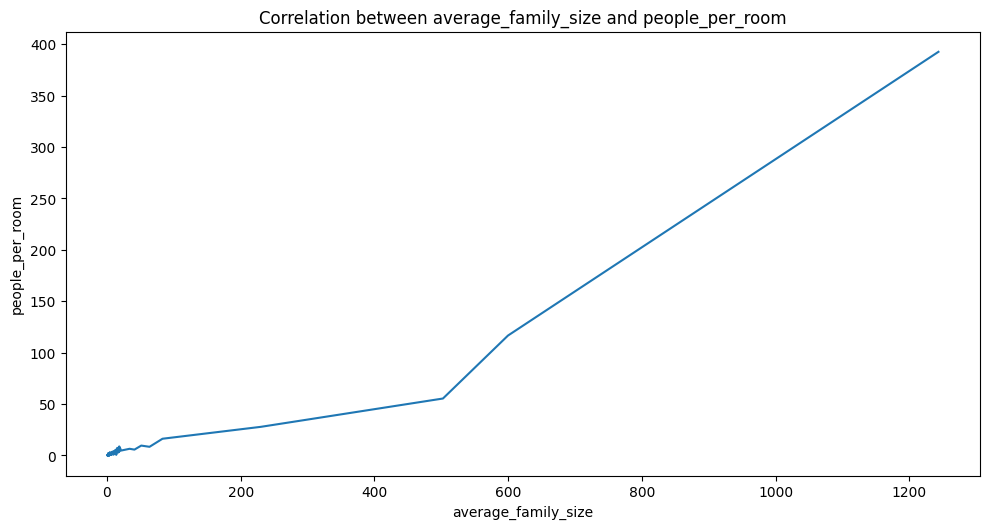

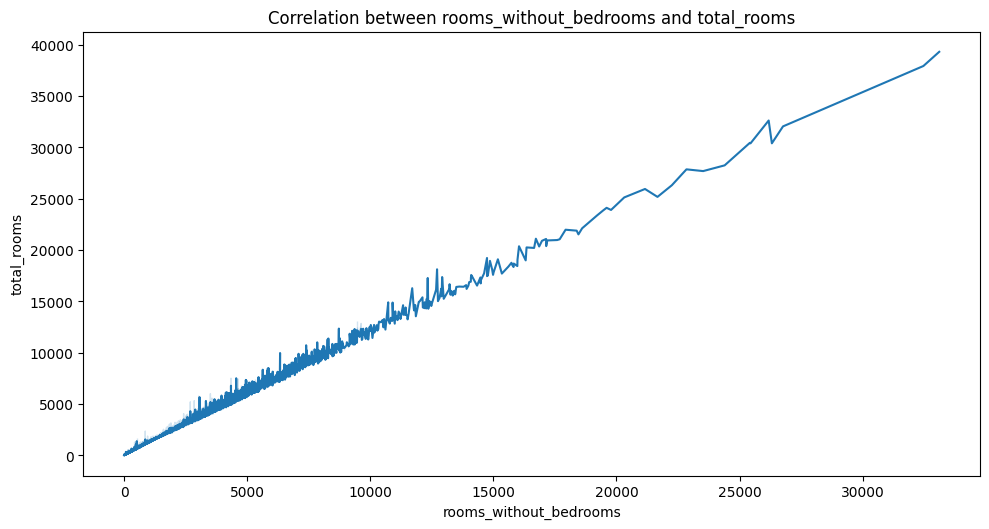

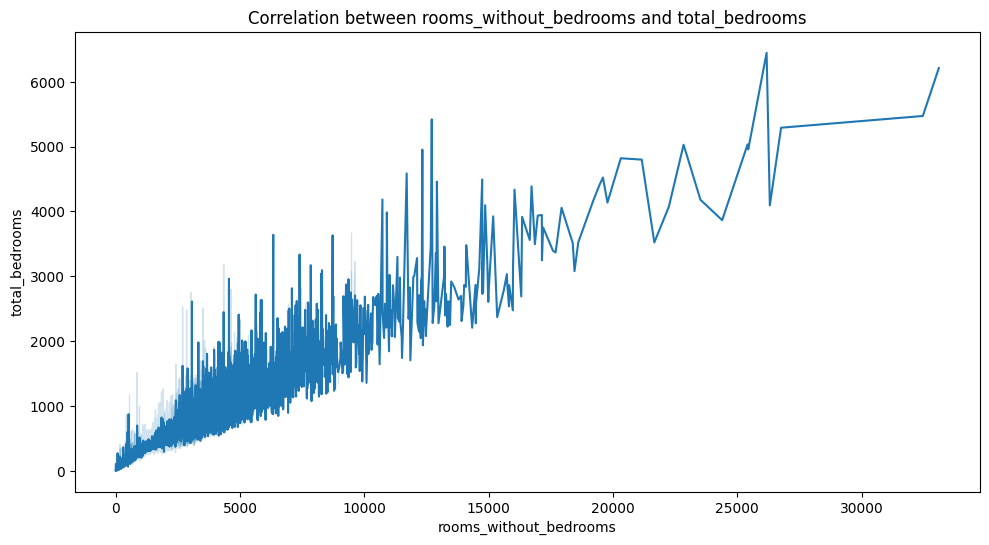

In [15]:
for i,(col1,col2) in enumerate(high_corrs):
    plt.figure(figsize=(10,5*len(high_corrs)))
    plt.subplot(len(high_corrs),1,i+1)
    sns.lineplot(data=df, x=col1, y=col2)
    plt.title(f"Correlation between {col1} and {col2}")
    plt.tight_layout()
    plt.show()

In [16]:
numeric_cols=[col for col in df.columns if df[col].dtype in ['int64','float64']]
categorical_cols=[col for col in df.columns if df[col].dtype=='object']

In [17]:
print("Number of numeric columns:", len(numeric_cols))
print("Number of categorical columns:", len(categorical_cols))

Number of numeric columns: 12
Number of categorical columns: 1


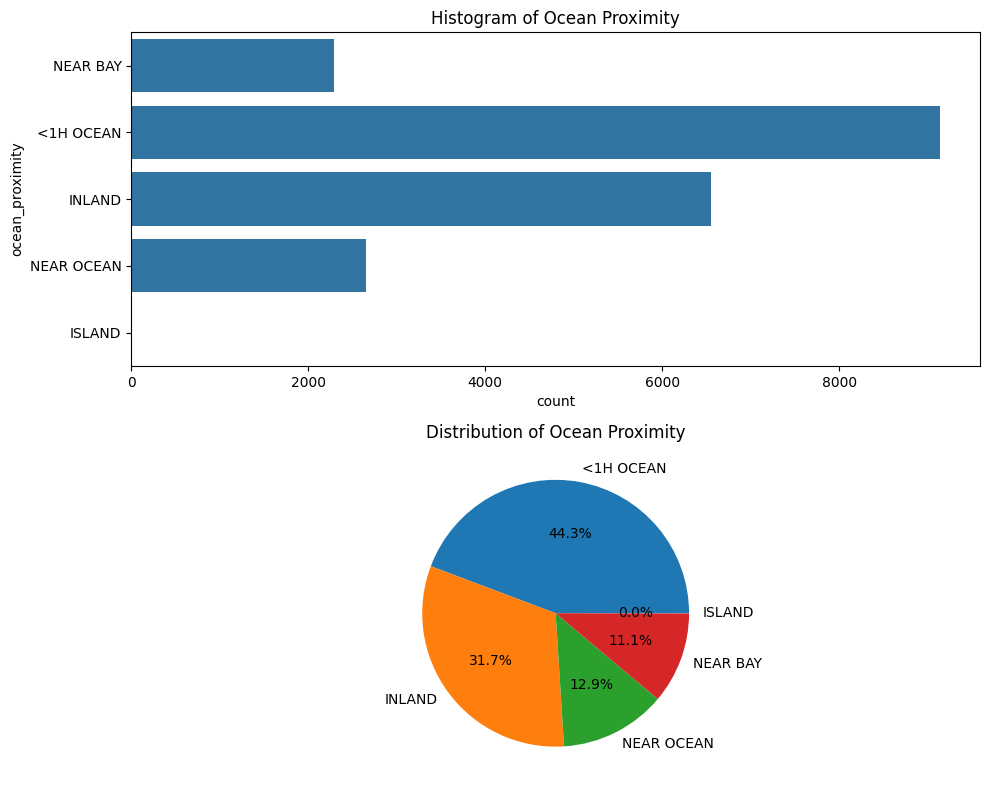

In [18]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.countplot(df["ocean_proximity"])
plt.title("Histogram of Ocean Proximity")
plt.subplot(2,1,2)
plt.pie(df['ocean_proximity'].value_counts(), labels=df['ocean_proximity'].value_counts().index, autopct='%1.1f%%')
plt.title("Distribution of Ocean Proximity")
plt.tight_layout()
plt.show()

In [19]:
### OUTLIERS DETECTION AND HANDLING ###
def outlier(df):
    outlier_dict={}
    for cols in numeric_cols:
        Q1=df[cols].quantile(0.25)
        Q3=df[cols].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        outliers=df[(df[cols]<lower_bound) | (df[cols]>upper_bound)]
        outlier_dict[cols]=outliers.shape[0]
    return outlier_dict

In [20]:
outlier(df)

{'longitude': 0,
 'latitude': 0,
 'housing_median_age': 0,
 'total_rooms': 1287,
 'total_bedrooms': 1271,
 'population': 1196,
 'households': 1220,
 'median_income': 681,
 'median_house_value': 1071,
 'people_per_room': 1555,
 'rooms_without_bedrooms': 1277,
 'average_family_size': 711}

In [21]:
from sklearn.preprocessing import PowerTransformer,OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.compose import ColumnTransformer
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline


In [22]:
X=df.drop("median_house_value", axis=1)
y=df["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [23]:
ind=numeric_cols.index('median_house_value')
numeric_cols.pop(ind)


'median_house_value'

In [24]:
categories=['ISLAND','INLAND','<1H OCEAN','NEAR OCEAN','NEAR BAY']

In [25]:
preprocessor=ColumnTransformer(transformers=[
    ('num', PowerTransformer(method='yeo-johnson'), numeric_cols),
    ('cat', OrdinalEncoder(categories=[categories]), categorical_cols),
    ],
                               remainder='passthrough')

X_train_transformed=preprocessor.fit_transform(X_train)
X_test_transformed=preprocessor.transform(X_test)

In [26]:
y_transformed,lmbda=boxcox(y_train)

In [27]:
def reverse_boxcox(y, lmbda):
    if lmbda == 0:
        return np.exp(y)
    else:
        return np.power(lmbda * y + 1, 1 / lmbda)


In [28]:
def show_metrics(y_true, y_pred):
    mse=mean_squared_error(y_true, y_pred)
    mae=mean_absolute_error(y_true, y_pred)
    r2=r2_score(y_true, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R^2 Score: {r2}")

In [29]:
def run_model(model):
    pipe=Pipeline(steps=[
        ('model',model)]
    )
    pipe.fit(X_train_transformed, y_transformed)
    y_pred_transformed=pipe.predict(X_test_transformed)
    y_pred=reverse_boxcox(y_pred_transformed, lmbda)
    show_metrics(y_test, y_pred)
    
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel("Actual Median House Value")
    plt.ylabel("Predicted Median House Value")
    plt.tight_layout()
    plt.show()

In [30]:
models={
    'AdaBoostRegressor': AdaBoostRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'LGBMRegressor': LGBMRegressor(),
    'XGBRegressor': XGBRegressor()
}

In [31]:
params_ada={
    'estimator':[RandomForestRegressor(), GradientBoostingRegressor(), LGBMRegressor()],
    'n_estimators':[50,100,200,None],
    'learning_rate':[0.01,0.1,0.2],
    'loss':['linear','square','exponential']   
}
params_random={
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
params_light={
    'boosting_type':['gbdt'],
    'n_estimators':[100,200,300],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,5,7],
    'subsample':[0.6,0.8,1.0],
    'num_leaves':[10,20,30,40,50,100,200]}
params_gbm={
    'n_estimators':[100,200,300],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,5,7],
    'subsample':[0.6,0.8,1.0]
    }

In [32]:
def get_decision(model,param):
    if model=='AdaBoostRegressor':
        search=RandomizedSearchCV(AdaBoostRegressor(), param_distributions=param, n_iter=10, cv=3, n_jobs=-1, random_state=42)
    elif model=='RandomForestRegressor':
        search=RandomizedSearchCV(RandomForestRegressor(), param_distributions=param, n_iter=10, cv=3, n_jobs=-1, random_state=42)
    elif model=='LGBMRegressor':
        search=RandomizedSearchCV(LGBMRegressor(), param_distributions=param, n_iter=10, cv=3, n_jobs=-1, random_state=42)
    elif model=='GradientBoostingRegressor':
        search=RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=param, n_iter=10, cv=3, n_jobs=-1, random_state=42)
    return search
    

In [37]:
def hyperparameter_tuning(model_name, search_type='random'):
    
    param_mapping = {
        'AdaBoostRegressor': params_ada,
        'RandomForestRegressor': params_random,
        'LGBMRegressor': params_light,
        'GradientBoostingRegressor': params_gbm
    }
    
    model_mapping = {
        'AdaBoostRegressor': AdaBoostRegressor(),
        'RandomForestRegressor': RandomForestRegressor(),
        'LGBMRegressor': LGBMRegressor(),
        'GradientBoostingRegressor': GradientBoostingRegressor(),
        'XGBRegressor': XGBRegressor()
    }
    
    if model_name not in model_mapping:
        print(f"Model {model_name} desteklenmiyor!")
        return None
    
    model = model_mapping[model_name]
    params = param_mapping.get(model_name, {})
    
    if not params:
        print(f"{model_name} için parametre tanımı bulunamadı! Model default parametrelerle çalıştırılacak.")
        return model
    
    # Search tipine göre tuning yap
    if search_type == 'random':
        search = RandomizedSearchCV(
            model, 
            param_distributions=params, 
            n_iter=10, 
            cv=3, 
            n_jobs=-1, 
            random_state=42,
            verbose=1
        )
    else:
        search = GridSearchCV(
            model, 
            param_grid=params, 
            cv=3, 
            n_jobs=-1, 
            random_state=42,
            verbose=1
        )
    
    print(f"{model_name} için {search_type} search başlatılıyor...")
    search.fit(X_train_transformed, y_transformed)
    
    print(f"\nEn iyi parametreler: {search.best_params_}")
    print(f"En iyi CV skoru: {search.best_score_}")
    
    return search.best_estimator_

LGBMRegressor için random search başlatılıyor...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2567
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 12
[LightGBM] [Info] Start training from score 27.573647
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

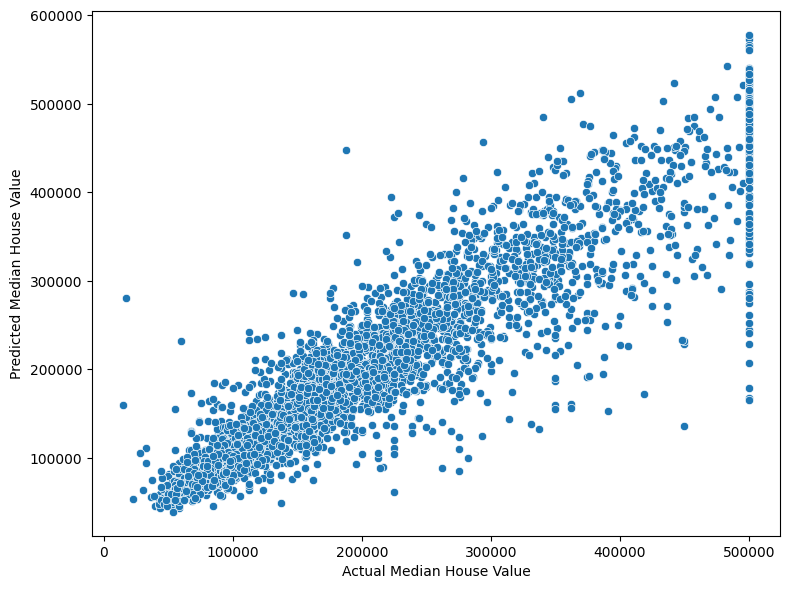

In [40]:
run_model(hyperparameter_tuning('LGBMRegressor', search_type='random'))